In [1]:
import numpy as np
import pandas as pd

In [2]:
encodings = ["utf-8", "latin-1", "windows-1252"]  
for encoding in encodings:
    try:
        df = pd.read_csv("spam.csv", encoding=encoding)
        print(f"Successfully read CSV with encoding: {encoding}")
        break  
    except UnicodeDecodeError:
        pass 

if not df:
    print("Failed to read CSV with any of the tried encodings.")

Successfully read CSV with encoding: latin-1


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1914,spam,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...,NaN,NaN,NaN
2307,spam,WIN a year supply of CDs 4 a store of ur choic...,NaN,NaN,NaN
2204,ham,Raji..pls do me a favour. Pls convey my Birthd...,NaN,NaN,NaN
739,ham,Haha mayb u're rite... U know me well. Da feel...,NaN,NaN,NaN
1433,ham,You intrepid duo you! Have a great time and se...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
5385,ham,How do friends help us in problems? They give ...
869,spam,What do U want for Xmas? How about 100 free te...
3656,ham,Studying. But i.ll be free next weekend.
3210,ham,"OH YEAH,AND HAV A GREAT TIME IN NEWQUAY-SEND M..."
2110,ham,Do we have any spare power supplies


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3792,ham,Hey are you angry with me. Reply me dr.
3031,ham,Jokin only lar... :-) depends on which phone m...
1406,spam,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD..."
1138,ham,What * u wearing?
286,ham,Ok..


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#checking for duplicate values
df.duplicated().sum()

np.int64(403)

In [11]:
# removing duplicates from dataset
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(5169, 2)

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

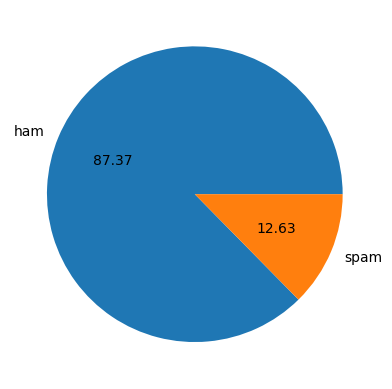

In [16]:
#So in above,there are 4516 not spam sms and 653 spam sms
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
# Data is imbalanced
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SOHAM
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
#Showing number of characters in messages 
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\SOHAM
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
#number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# ham:Not spam messages- number of characters,words,sentences are described
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#spam:Spam messages-number of characters,words,sentences are described
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

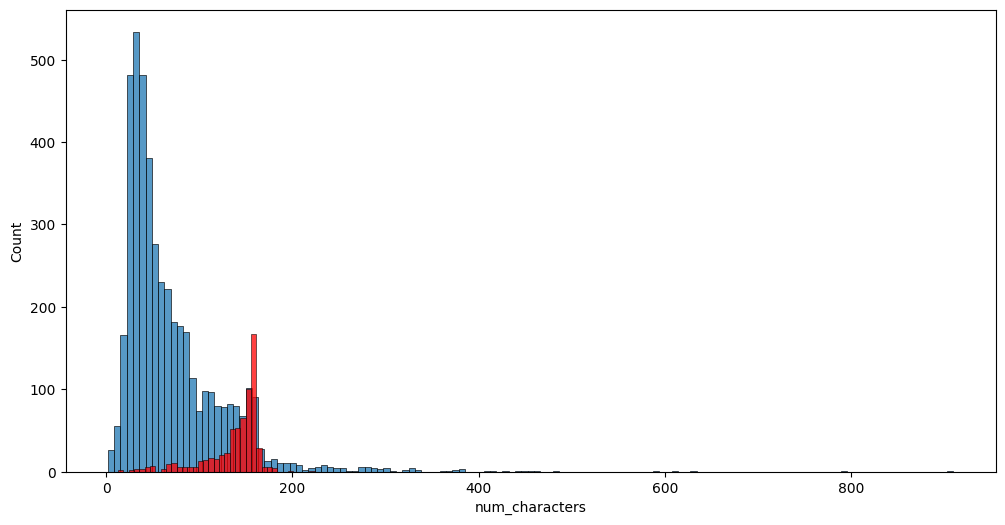

In [25]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

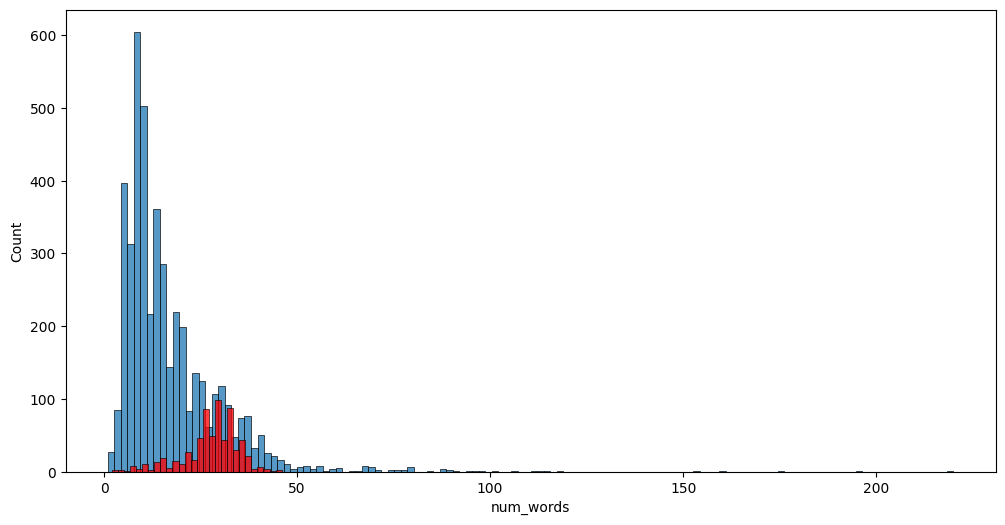

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

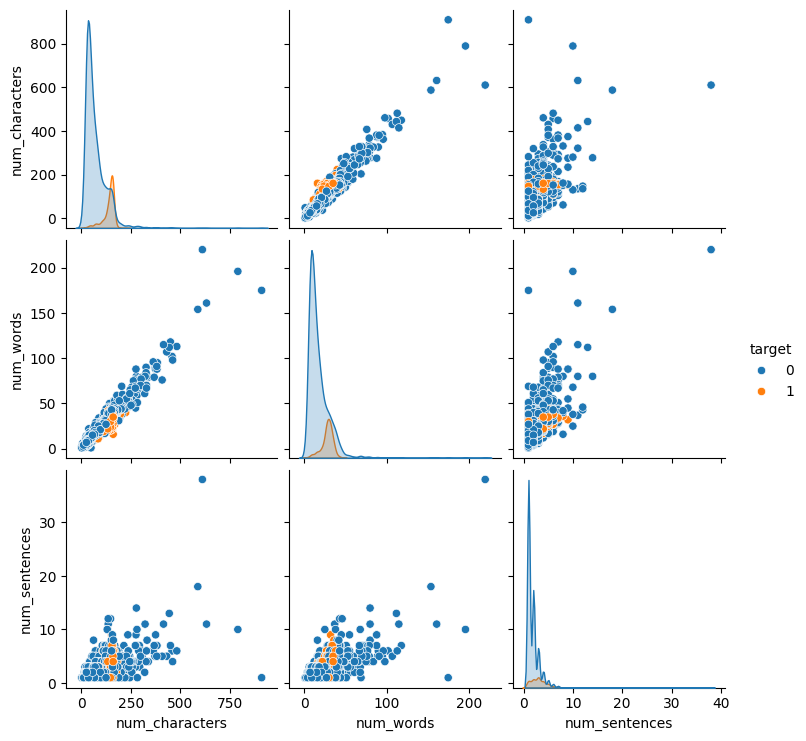

In [27]:
sns.pairplot(df,hue='target')

<Axes: >

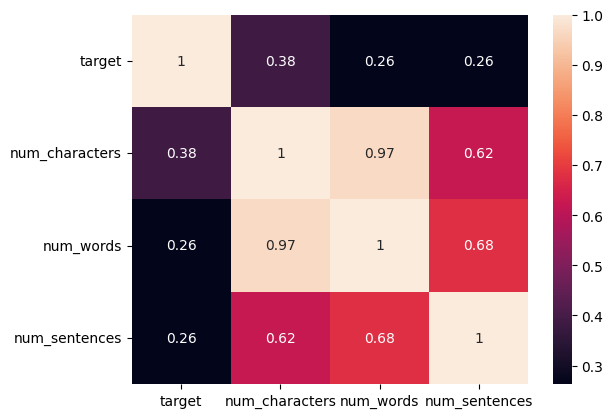

In [28]:
df_corr = df.select_dtypes(exclude=object).corr()  # Exclude object type (text)
sns.heatmap(df_corr, annot=True)

In [29]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

def transform_text(text):
    """Transforms text by applying lowercase, tokenization, stop word removal,
    punctuation removal, and stemming.

    Args:
        text (str): The input text to be transformed.

    Returns:
        str: The transformed text.
    """


    nltk.download('stopwords')  # Add this line

    text = text.lower()
    text = nltk.word_tokenize(text)
    filtered_words = [word for word in text if word.isalnum()]
    filtered_words = [word for word in filtered_words if word not in stopwords.words('english') and word not in string.punctuation]
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    transformed_text = " ".join(stemmed_words)

    return transformed_text


text = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
transformed_text = transform_text(text)
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to C:\Users\SOHAM
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [31]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import pandas as pd

def transform_text(text):
    """Transforms text by applying lowercase, tokenization, removing special characters,
    stop words, and punctuation, and stemming.

    Args:
        text: The input text to be transformed.

    Returns:
        The transformed text.
    """
    stop_words = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)

    
    words = [word.lower() for word in nltk.word_tokenize(text) if word.isalnum() and word not in stop_words and word not in punctuation_set]


    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return " ".join(words)


df['transformed_text'] = df['text'].apply(transform_text)


print(df['transformed_text'].head())

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4               nah i think goe usf live around though
Name: transformed_text, dtype: object


In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


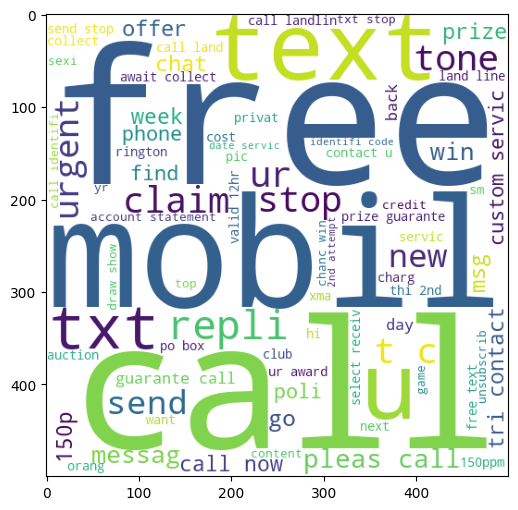

In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

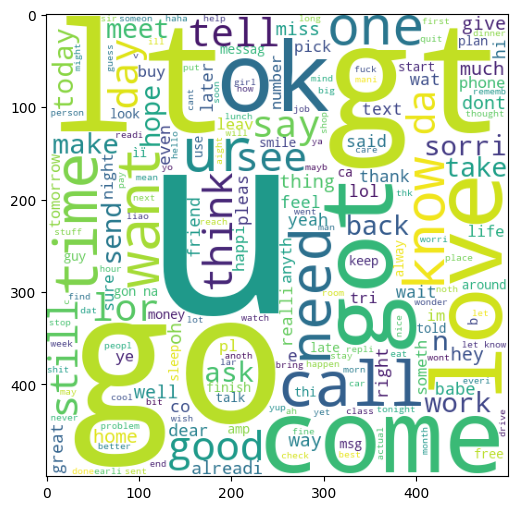

In [35]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [37]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)



In [38]:
len(spam_corpus)

10847

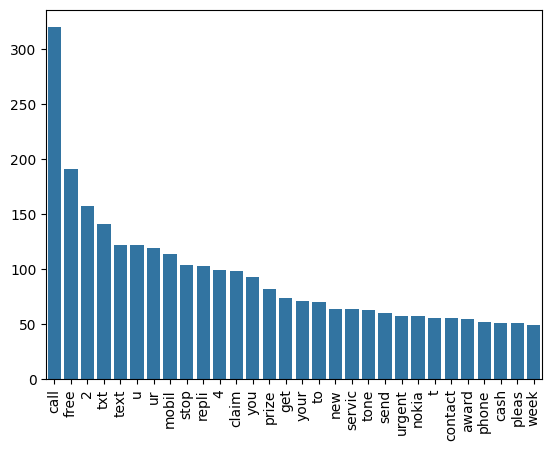

In [39]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt  
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
word_counts = Counter(spam_corpus)
most_common_words = word_counts.most_common(30)
words, counts = zip(*most_common_words)
sns.barplot(x=words, y=counts)
plt.xticks(rotation='vertical')
plt.show()


In [40]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)


40814

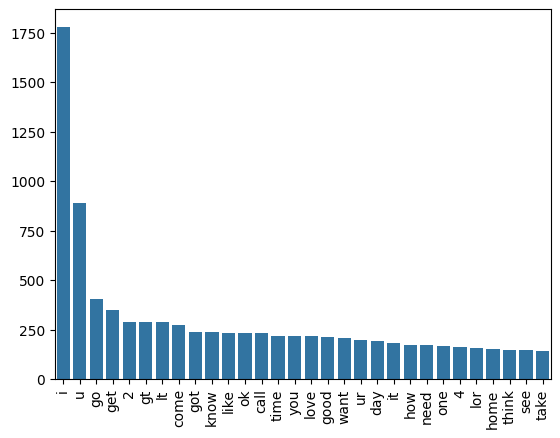

In [41]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt  
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
word_counts = Counter(ham_corpus)
most_common_words = word_counts.most_common(30)
words, counts = zip(*most_common_words)
sns.barplot(x=words, y=counts)
plt.xticks(rotation='vertical')
plt.show()


In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [43]:
#Model Building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [44]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [45]:
X.shape


(5169, 3000)

In [46]:
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.874274661508704
[[792 104]
 [ 26 112]]
0.5185185185185185


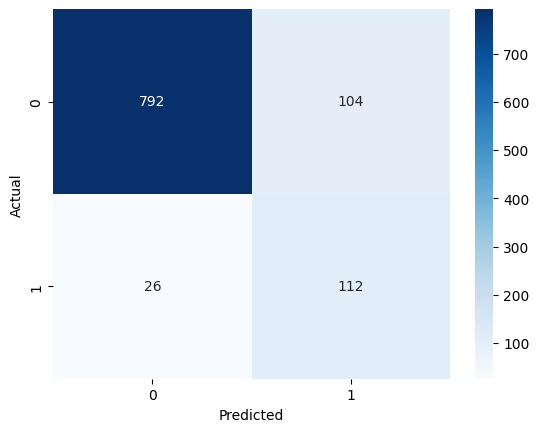

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


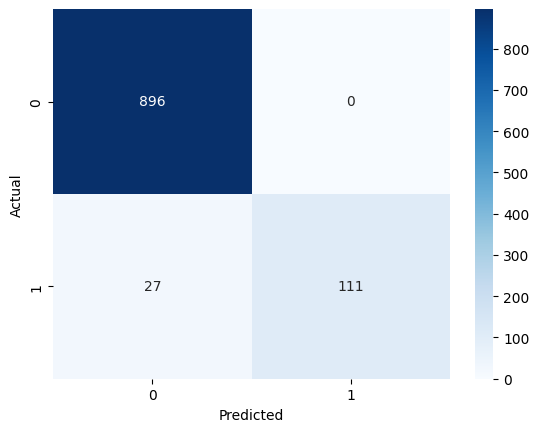

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9825918762088974
[[895   1]
 [ 17 121]]
0.9918032786885246


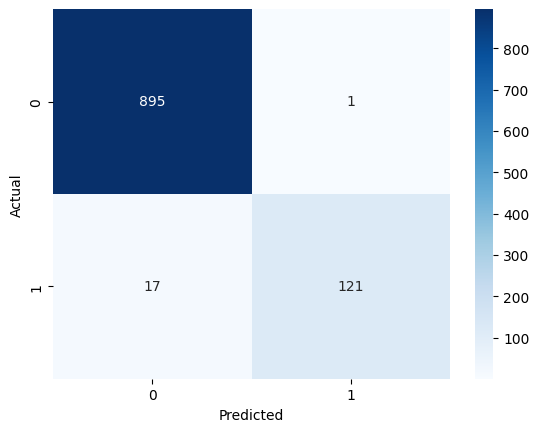

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [53]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [54]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [55]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [56]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9787234042553191, np.float64(0.9915254237288136))

In [57]:
import numpy as np

# Assuming clfs is a dictionary containing classifiers and their names
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = np.mean(y_pred == y_test)
    precision = np.sum(y_pred & y_test) / np.sum(y_pred)

    print(f"For {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

For SVC:
Accuracy: 0.9787
Precision: 0.9915
For KN:
Accuracy: 0.9159
Precision: 1.0000
For NB:
Accuracy: 0.9739
Precision: 1.0000
For DT:
Accuracy: 0.9294
Precision: 0.8155
For LR:
Accuracy: 0.9555
Precision: 0.9600
For RF:
Accuracy: 0.9729
Precision: 0.9825


C:\Users\SOHAM K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost:
Accuracy: 0.9603
Precision: 0.9217
For BgC:
Accuracy: 0.9565
Precision: 0.8605
For ETC:
Accuracy: 0.9778
Precision: 0.9752
For GBDT:
Accuracy: 0.9516
Precision: 0.9314
For xgb:
Accuracy: 0.9691
Precision: 0.9492


In [58]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.915861,1.000000
2,NB,0.973888,1.000000
0,SVC,0.978723,0.991525
5,RF,0.972921,0.982456
8,ETC,0.977756,0.975207
4,LR,0.955513,0.960000
10,xgb,0.969052,0.949153
9,GBDT,0.951644,0.931373
6,AdaBoost,0.960348,0.921739
7,BgC,0.956480,0.860465


In [59]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.915861
1,NB,Accuracy,0.973888
2,SVC,Accuracy,0.978723
3,RF,Accuracy,0.972921
4,ETC,Accuracy,0.977756
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.969052
7,GBDT,Accuracy,0.951644
8,AdaBoost,Accuracy,0.960348
9,BgC,Accuracy,0.956480


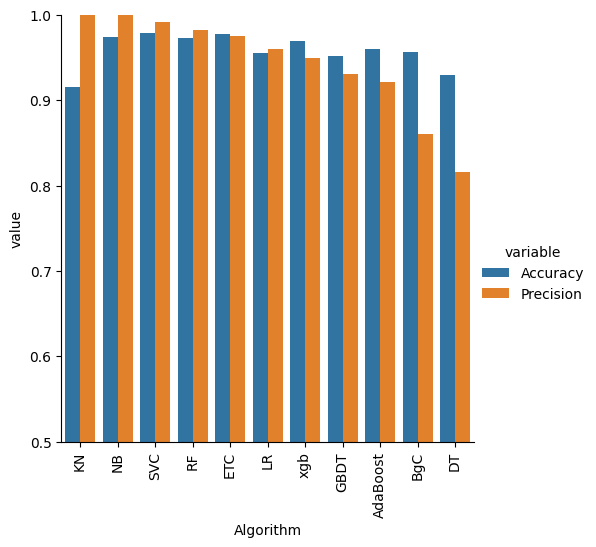

In [60]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [61]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.915861,1.000000,0.915861,1.000000,0.915861,1.000000,0.915861,1.000000
1,NB,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
2,SVC,0.978723,0.991525,0.978723,0.991525,0.978723,0.991525,0.978723,0.991525
3,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,ETC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
5,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
6,xgb,0.969052,0.949153,0.969052,0.949153,0.969052,0.949153,0.969052,0.949153
7,GBDT,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373
8,AdaBoost,0.960348,0.921739,0.960348,0.921739,0.960348,0.921739,0.960348,0.921739
9,BgC,0.956480,0.860465,0.956480,0.860465,0.956480,0.860465,0.956480,0.860465


In [62]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [63]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9806576402321083
Precision 0.9916666666666667


In [64]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [65]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
